In [15]:
import numpy as np
import pandas as pd
import genetic_algorithm.population as population

pop = population.generate_random_forest(10, 3)

In [16]:
import genetic_algorithm.transforms as transforms
data = pd.read_csv("../data/ES15.csv")
x_raw = data.values

In [17]:
x_gen = transforms.forest2features(
    population=pop,
    x_raw=x_raw
)

kappas [(np.float64(1.685),)]
<class 'list'> 2
<class 'list'> 1
[1 1]
kappas [(np.float64(0.002),)]


/home/logankelsch/BS/Behavioral_Search/src/genetic_algorithm/transforms.py:1303: RuntimeWarning: overflow encountered in divide
  np.divide(xptr[:, op_idx], x_denom[:, op_idx], out=xptr[:, op_idx], where=(x_denom[:, op_idx] != 0))


<class 'list'> 1
<class 'list'> 1
[0 1]


0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object


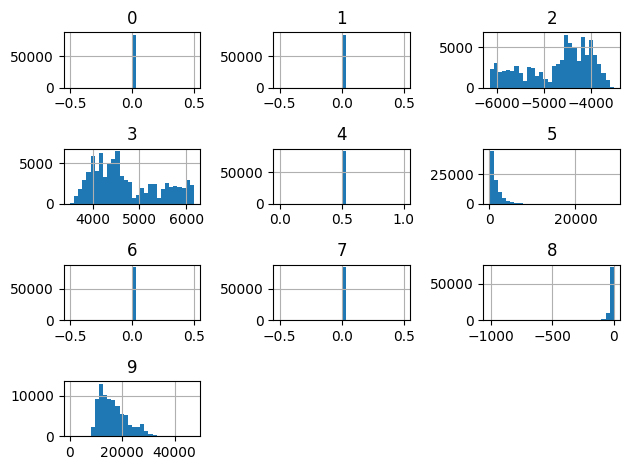

In [18]:
import matplotlib.pyplot as plt
x = pd.DataFrame(x_gen)
print(x.dtypes)
x.hist(bins=30)
plt.tight_layout()
plt.show()

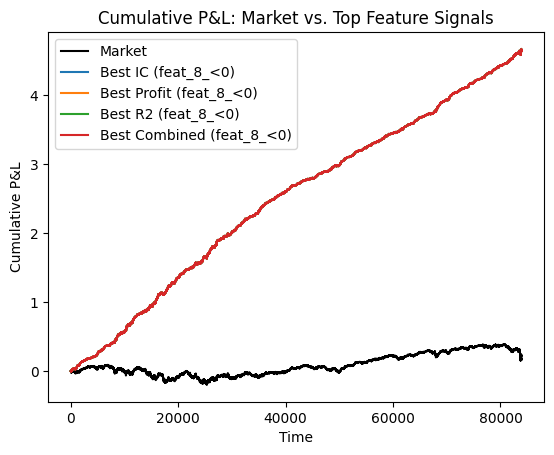

                    ic    profit        r2      combined
feat_8_<0     0.077804  4.639560  0.988774  4.587477e+00
feat_8_<mean  0.077804  3.968042  0.966408  3.834747e+00
feat_9_<mean  0.003451  0.233275  0.770192  1.796666e-01
feat_5_>mean  0.010107  0.137659  0.881254  1.213129e-01
feat_9_>0     0.003451  0.162820  0.683621  1.113073e-01
feat_2_>mean  0.004358  0.112236  0.465065  5.219706e-02
feat_3_<mean  0.004358  0.112236  0.465065  5.219706e-02
feat_2_<mean  0.004358  0.050642  0.660946  3.347157e-02
feat_3_>mean  0.004358  0.050642  0.660946  3.347157e-02
feat_5_<mean  0.010107  0.025218  0.127790  3.222674e-03
feat_9_<0     0.003451  0.000058  0.000075  4.322177e-09
feat_9_>mean  0.003451 -0.070397  0.220965 -1.555530e-02
feat_8_>mean  0.077804 -3.805164  0.918267 -3.494158e+00
feat_8_>0     0.077804 -4.476682  0.967121 -4.329495e+00
[8, 9, 5, 2, 3]


In [19]:
import genetic_algorithm.evaluation as evaluation

scoresdf, bestlist = evaluation.plot_best_feature_pnls(x_gen, x_raw[:, 3], max_lag=120)

print(scoresdf)
print(bestlist)

In [21]:
import genetic_algorithm.transforms as transforms

oplist = transforms.get_oplist(pop[8])
print(oplist)

[[0, 1, ()], [8, 0, (np.float64(1.685),)], [7, 0, (26, 26)], [4, 0, ()]]


In [ ]:
import pydot
from IPython.display import Image

def visualize_tree(root, filename='tree.png'):
    """
    Recursively visualize a binary tree with children `._x` and `._alpha`
    using pydot/Graphviz. Saves to `filename` and returns an IPython Image.
    """
    graph = pydot.Dot('Tree', graph_type='digraph', rankdir='TB')
    seen = {}  # map python id(node) -> graph node name

    def recurse(node):
        if node is None:
            return None

        nid = id(node)
        # If we already created this graph node, just return its name
        if nid in seen:
            return seen[nid]

        # Create a unique name and label for this node
        gname = f"node_{nid}"
        label = repr(node)  # or use node.value, node.name, etc.
        graph_node = pydot.Node(gname, label=label, shape='circle')
        graph.add_node(graph_node)
        seen[nid] = gname

        # For each child attribute, draw edge if child exists
        for attr in ('_x', '_alpha'):
            child = getattr(node, attr, None)
            if child is not None:
                cname = recurse(child)
                graph.add_edge(pydot.Edge(gname, cname, label=attr))

        return gname

    recurse(root)
    graph.write_png(filename)
    return Image(filename)
